<a href="https://colab.research.google.com/github/tarun201/FastAI_movie_reviews/blob/master/Copy_of_fast_ai_movie_review6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [fast_ai_movie_review](https://github.com/navneetkrc/Colab_fastai/blob/master/NLP/fast_ai_movie_review.ipynb)



In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [0]:
from fastai import *
from fastai.text import * 
from fastai.gen_doc.nbdoc import *
from fastai.datasets import * 
from fastai.datasets import Config
from pathlib import Path
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
#import fastai; 
#fastai.show_install(1)
# !ls

Download data manually from [here](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data)

Then upload it on colab using below codes

In [0]:
from google.colab import files
files.upload()

In [0]:
# !pip install -U -q kaggle
# !echo '{"username":"username","key":"XXxxxxxxxxxxxxxx"}'> ~/.kaggle/kaggle.json  # Replace
# #!chmod 600 kaggle.json

In [5]:
!unzip sentiment-analysis-on-movie-reviews.zip

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: sampleSubmission.csv    
  inflating: train.tsv               
  inflating: test.tsv                


In [0]:
!mkdir -p ~/.kaggle
!mkdir -p input

Move the "test.tsv" & "train.tsv" file to the folder "input"

In [0]:
!mv test.tsv train.tsv input/

In [0]:
# !kaggle competitions download -c sentiment-analysis-on-movie-reviews

In [0]:
# !unzip test.tsv.zip -d input
# !unzip train.tsv.zip -d input
# !mv sampleSubmission.csv input/

In [0]:
path = Path('../input/')
path_working = Path('kaggle/')

In [11]:
df = pd.read_csv('input/train.tsv', sep="\t")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [12]:
df['is_valid'] = 0
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,is_valid
0,1,1,A series of escapades demonstrating the adage ...,1,0
1,2,1,A series of escapades demonstrating the adage ...,2,0
2,3,1,A series,2,0
3,4,1,A,2,0
4,5,1,series,2,0


In [13]:
df.loc[:50, 'is_valid'] = 1
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,is_valid
0,1,1,A series of escapades demonstrating the adage ...,1,1
1,2,1,A series of escapades demonstrating the adage ...,2,1
2,3,1,A series,2,1
3,4,1,A,2,1
4,5,1,series,2,1


In [14]:
df_test = pd.read_csv('input/test.tsv', sep="\t")
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [0]:
df.rename(index=str, columns={"Phrase": "text", "Sentiment": "target"},inplace=True)

In [0]:
df_test.rename(index=str, columns={"Phrase": "text", "Sentiment": "target"},inplace=True)

In [0]:
df_test['is_valid'] = 0

In [0]:
df_test.to_csv(f'test.csv', index=False)

In [0]:
df.to_csv(f'train.csv', index=False)

In [0]:
!mkdir kaggle
!mv train.csv kaggle/
!mv test.csv kaggle/

In [21]:
df_mod = pd.read_csv('kaggle/train.csv')
df_mod.head()

,PhraseId,SentenceId,text,target,is_valid
0,1,1,A series of escapades demonstrating the adage ...,1,1
1,2,1,A series of escapades demonstrating the adage ...,2,1
2,3,1,A series,2,1
3,4,1,A,2,1
4,5,1,series,2,1


In [22]:
path_working

PosixPath('kaggle')

In [0]:
data_lm = (TextList.from_csv(path_working, 'train.csv', cols='text') 
                   .random_split_by_pct()
                   .label_for_lm()
                   .add_test(TextList.from_csv(path_working, 'test.csv', cols='text'))
                   .databunch())

In [24]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.7)
#learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.7)
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(15092, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(15092, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=15092, bias=True)
    (output_dp): RNNDropout()
  )
)

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


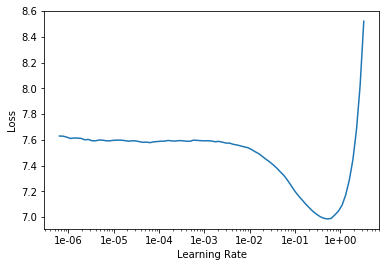

In [0]:
learn.recorder.plot()

**Increasing the number of epochs from 2 to 5 **
Adding Momentum to all the fit one


In [26]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.352758,4.556601,0.277166,01:57
1,4.297843,3.792544,0.343705,01:56
2,3.853230,3.453943,0.386370,01:57
3,3.638815,3.298913,0.409155,01:56
4,3.539491,3.275249,0.412647,01:57


In [0]:
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

In [0]:
#load the encoder models in models folder
# !mkdir kaggle/models
# !mv mini_train_encoder.pth kaggle/models/
# !mv mini_train_lm.pth kaggle/models/

In [0]:
#learn.load_encoder('ft_enc53')
learn.load_encoder('mini_train_encoder')

In [30]:
learn.show_results()

text,target,pred
xxbos xxmaj douglas mcgrath 's xxmaj nicholas xxmaj nickleby does xxmaj dickens as it should be done cinematically . xxbos,as a detailed personal portrait and xxbos powerful and revelatory xxbos a touch too xxmaj arthouse 101 in its poetic,xxmaj a film portrait portrait of a xxmaj and moving xxbos xxmaj powerful of much hollywood 101 xxbos a own
an entertainment destination for the general public xxbos an interesting look xxbos in many ways the perfect festival film :,"a calm , self - assured portrait of small town regret , love , duty and friendship that appeals to","a tribute , thoughtful - assured portrait of the town regret and a and duty and friendship . is to"
the flicks moving in and out of the multiplex xxbos at the star - making machinery of tinseltown xxbos atop,an undercurrent of loneliness and isolation xxbos xxmaj halle xxmaj berry does her best to keep up with him xxbos,a undercurrent of loneliness and isolation xxbos xxmaj the xxmaj berry 's n't best xxbos make the with the xxbos
in the mind of the killer xxbos is not only a love song to the movies xxbos not very informative,about its titular xxbos is xxmaj kissinger may have decided that -- when it comes to truncheoning -- it 's,xxbos the characters character xxmaj a the 's be been to he if it comes to truncheoning -- it 's
xxbos a bunch of typical late - twenty - somethings natter on about nothing xxbos a promise nor xxbos the,"modest , crowd - pleasing goals it sets for itself xxbos there , done that xxbos 's never dull and","film , modest - pleasing goals xxbos is out itself xxbos xxmaj 's and , , xxmaj a quite xxbos"


In [0]:
# !nvidia-smi

In [0]:
# ??TextList.from_csv

In [0]:
# data_clas = (TextList.from_csv(path_working, 'train.csv',cols='text', vocab=data_lm.vocab, test='test.csv')
#     .split_from_df(col='is_valid') #is_valid
#     .label_from_df(cols='target')
#     .add_test(TextList.from_csv(path_working, 'test.csv', cols='text'))
#     .databunch(bs=42))
data_clas = (TextList.from_csv(path_working, 'train.csv',cols='text', vocab=data_lm.vocab)
    .split_from_df(col='is_valid') #is_valid
    .label_from_df(cols='target')
    .add_test(TextList.from_csv(path_working, 'test.csv', cols='text'))
    .databunch(bs=42))

In [0]:
# type(data_clas.test_dl)

In [35]:
data_clas.show_batch()

text,target
"xxbos xxup -lrb- xxmaj city xxup -rrb- reminds us how realistically nuanced a xxmaj robert xxmaj de xxmaj niro performance can be when he is not more lucratively engaged in the shameless self - caricature of ` xxmaj analyze xxmaj this ' xxup -lrb- 1999 xxup -rrb- and ` xxmaj analyze xxmaj that , ' promised xxup -lrb- or threatened xxup -rrb- for later this year .",3
"xxbos xxmaj if xxmaj oscar had a category called xxmaj best xxmaj bad xxmaj film xxmaj you xxmaj thought xxmaj was xxmaj going xxmaj to xxmaj be xxmaj really xxmaj awful xxmaj but xxmaj was n't , xxmaj guys would probably be duking it out with xxmaj the xxmaj queen of the xxmaj damned for the honor .",1
"xxbos be captivated , as i was , by its moods , and by its subtly transformed star , and still wonder why xxmaj paul xxmaj thomas xxmaj anderson ever had the inclination to make the most sincere and artful movie in which xxmaj adam xxmaj sandler will probably ever appear",4
"xxbos xxmaj the fascination comes in the power of the xxmaj huston performance , which seems so larger than life and yet so fragile , and in the way the xxmaj ivan character accepts the news of his illness so quickly but still finds himself unable to react .",3
"xxbos xxmaj phillip xxmaj noyce and all of his actors -- as well as his cinematographer , xxmaj christopher xxmaj doyle -- understand the delicate forcefulness of xxmaj greene 's prose , and it 's there on the screen in their version of xxmaj the xxmaj quiet xxmaj american",3


In [0]:
#??text_classifier_learner()

In [37]:
data_clas.c

5

In [0]:
#len(data_clas.vocab.itos)

In [44]:
learn = text_classifier_learner(data_clas, AWD_LSTM)
# learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(15092, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(15092, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1150, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1150, 1150, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1150, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.4)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=

In [0]:
#learn.crit = F.binary_cross_entropy
learn.crit = F.binary_cross_entropy_with_logits

In [0]:
# %cd kaggle/models/m
# !ls

In [47]:
learn.load_encoder('mini_train_encoder')
learn.fit_one_cycle(5, slice(1e-3,1e-2),moms=(0.95,0.85))
learn.save('mini_train_clas')

epoch,train_loss,valid_loss,accuracy,time
0,1.255516,0.639007,0.882353,01:49
1,1.221257,0.572915,0.862745,01:41
2,1.235774,0.655030,0.862745,01:40
3,1.204012,0.562084,0.862745,01:53
4,1.196699,0.665193,0.862745,01:44


**Using Momentum just on the text classifier didn't seem to do any changes on the final result**

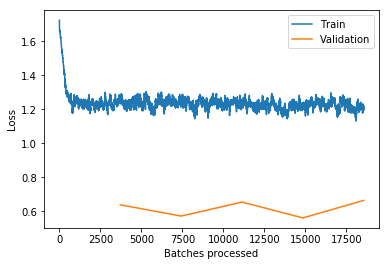

In [48]:
learn.recorder.plot_losses()

In [0]:
# # get predictions
# preds, targets = learn.get_preds()

# predictions = np.argmax(preds, axis = 1)
# pd.crosstab(predictions, targets)

In [0]:
# learn.show_results()

In [0]:
# predictions
# learn.get_preds()
# df["text"].iloc[5]

In [0]:
# probs = np.mean(np.exp(preds),0)
# # probs = np.mean(np.exp(preds),dtype=np.float32)


In [0]:
# preds = np.argmax(probs, axis=1)
# probs = probs[:,1]

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y, preds)

# plot_confusion_matrix(cm, data.classes)

In [0]:
# Language model data
#data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
#data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
#type(learn.data.test_dl)

In [0]:
# probs, _ = learn.get_preds(DatasetType.Test)

In [0]:
# probs.shape

In [0]:
# probs[0]

In [0]:
# preds = np.argmax(probs, axis=1)

In [0]:
# ids = df_test["PhraseId"].copy()

In [0]:
# # submission = pd.DataFrame(data={
#     "PhraseId": ids,
#     "Sentiment": preds
# })
# submission.to_csv("submission.csv", index=False)
# submission.head(n=10)

In [0]:
#df.head()

In [0]:
#from sklearn.model_selection import train_test_split

# split data into training and validation set
#df_trn, df_val = train_test_split(df, stratify = df['target'], test_size = 0.4, random_state = 12)

In [0]:
# Language model data
#data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "../input")


In [0]:

# Classifier model data
#data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)